<a href="https://colab.research.google.com/github/Chinmayak1197/MNIST-DATASET/blob/main/MNIST_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#MNIST Project 
#torchvision cointains utilities for working with the image data, also allows to get popular dataset 

import torch 
import torchvision 
from torchvision.datasets import MNIST

#Download the training dataset 
dataset =  MNIST(root='data/' , download = True)

len(dataset)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



60000

In [2]:
test_dataset = MNIST(root='data/', train = False)
len(test_dataset)

10000

In [3]:
#PIL is python imaging library pillow to load the images 
dataset[0]

import matplotlib.pyplot as plt
#Inline command which tells that we need to see the graphs in the notebook not as a popoup 
%matplotlib inline 

Label:  5


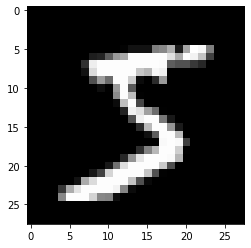

In [4]:
image, label = dataset[0]
plt.imshow(image, cmap= 'gray')
print('Label: ', label)

Label:  3


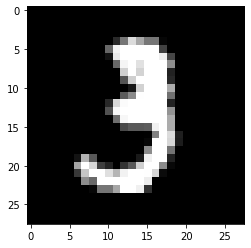

In [5]:
image, label = dataset[10]
plt.imshow(image, cmap= 'gray')
print('Label: ', label)

In [6]:
import torchvision.transforms as transforms
#these convert images to tensors 

dataset = MNIST(root = "data/", train = True, transform = transforms.ToTensor())

In [7]:
img_tensor, label = dataset[0]
print(img_tensor.shape , label )

#First dimension is the color channel 
#next two dimensions are height and width 


torch.Size([1, 28, 28]) 5


In [8]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


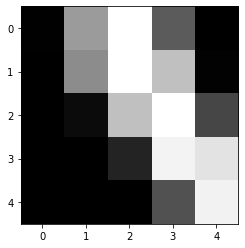

In [9]:
#Matplotlib keeps the color dimension as the last or does not keep it whereas the pytorch keeps it as the first dimensions
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [10]:
import numpy as np 

def split_indices(n, val_pct):
  n_val = int(n*val_pct)
  idex = np.random.permutation(n)

  return idex[n_val:], idex[:n_val]




In [12]:
train_indices , val_indices = split_indices(len(dataset), val_pct = 0.2)

print(len(train_indices), len(val_indices))
print('sample val indices:', val_indices[:20])

#Randomly sampling is done as the data may be in order 
#time series might be tricky so has to see case v=bt case and does not have to do random smapling  

48000 12000
sample val indices: [43359  7036 46537 58653 29337 32988 22115 39050   313 34624 33665 30428
  4705 49172  4555 55659 33475 32885 15470 23366]


In [13]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader 

batch_size = 100 
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler= val_sampler)



In [21]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [22]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0078, -0.0208,  0.0244,  ...,  0.0216,  0.0211,  0.0169],
        [ 0.0100, -0.0160,  0.0260,  ...,  0.0186,  0.0347, -0.0117],
        [ 0.0317,  0.0284,  0.0087,  ...,  0.0339, -0.0115, -0.0311],
        ...,
        [ 0.0172,  0.0268,  0.0318,  ..., -0.0173,  0.0352, -0.0003],
        [ 0.0105, -0.0220, -0.0013,  ..., -0.0125,  0.0072, -0.0120],
        [-0.0298,  0.0337,  0.0319,  ...,  0.0175,  0.0262,  0.0285]],
       requires_grad=True)

In [23]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0131,  0.0267,  0.0041,  0.0220, -0.0077,  0.0173,  0.0076,  0.0130,
         0.0153, -0.0192], requires_grad=True)

In [24]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([5, 2, 3, 3, 6, 3, 8, 4, 3, 0, 0, 4, 2, 8, 8, 5, 5, 1, 3, 8, 1, 9, 6, 6,
        7, 5, 8, 9, 4, 8, 3, 4, 5, 7, 1, 4, 7, 3, 4, 5, 5, 1, 4, 0, 0, 6, 7, 9,
        7, 7, 2, 7, 9, 1, 1, 3, 7, 8, 5, 6, 3, 2, 0, 9, 6, 2, 7, 5, 2, 3, 4, 2,
        0, 2, 1, 9, 0, 2, 1, 1, 2, 6, 1, 1, 2, 2, 1, 3, 1, 3, 6, 7, 7, 2, 7, 2,
        5, 6, 4, 2])
torch.Size([100, 1, 28, 28])


RuntimeError: ignored

In [25]:
images.shape

torch.Size([100, 1, 28, 28])

In [27]:
images.reshape(100, 784).shape

torch.Size([100, 784])

In [28]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [29]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [30]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 5.6759e-03,  2.8365e-02,  3.0237e-05,  ...,  7.2125e-03,
          -3.5273e-02,  2.2175e-02],
         [ 1.8005e-02,  2.1569e-02,  1.4232e-03,  ...,  2.9687e-02,
           1.9371e-03, -3.5235e-02],
         [-6.1244e-05,  3.3674e-02, -1.0544e-02,  ..., -2.1539e-02,
           1.8534e-02, -2.2943e-03],
         ...,
         [-2.3981e-02, -1.1729e-02, -2.1161e-02,  ...,  1.3691e-02,
           1.6947e-02,  1.6765e-02],
         [ 2.8214e-02,  3.3939e-02,  3.3775e-02,  ...,  2.6019e-02,
           1.8816e-02, -1.9651e-02],
         [ 6.9054e-03,  1.8164e-02,  1.8440e-02,  ...,  8.7945e-03,
           1.6437e-02, -4.4689e-03]], requires_grad=True),
 Parameter containing:
 tensor([-0.0219,  0.0349,  0.0238, -0.0039, -0.0204, -0.0291,  0.0167, -0.0006,
         -0.0339, -0.0206], requires_grad=True)]

In [31]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([100, 1, 28, 28])
outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[ 2.8080e-01,  2.3659e-01,  3.0535e-02,  4.1522e-02, -1.7943e-01,
         -4.1488e-03,  2.5126e-04,  1.0195e-01, -1.8421e-01,  2.5444e-01],
        [ 1.6762e-01, -1.2984e-01,  3.8621e-02,  2.4603e-01, -1.4693e-02,
         -1.5720e-02, -3.1680e-02,  1.0176e-01, -5.6181e-02,  1.0680e-01]])


In [32]:
import torch.nn.functional as F
outputs[:2]

tensor([[ 2.8080e-01,  2.3659e-01,  3.0535e-02,  4.1522e-02, -1.7943e-01,
         -4.1488e-03,  2.5126e-04,  1.0195e-01, -1.8421e-01,  2.5444e-01],
        [ 1.6762e-01, -1.2984e-01,  3.8621e-02,  2.4603e-01, -1.4693e-02,
         -1.5720e-02, -3.1680e-02,  1.0176e-01, -5.6181e-02,  1.0680e-01]],
       grad_fn=<SliceBackward0>)

In [33]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1235, 0.1181, 0.0961, 0.0972, 0.0779, 0.0929, 0.0933, 0.1032, 0.0776,
         0.1203],
        [0.1128, 0.0838, 0.0992, 0.1220, 0.0940, 0.0939, 0.0924, 0.1056, 0.0902,
         0.1061]])
Sum:  0.9999999403953552


In [34]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 3, 3, 0, 3, 7, 0, 0, 9, 0, 3, 0, 0, 0, 3, 6, 3, 3, 0, 9, 0, 0, 0, 7,
        3, 9, 0, 9, 7, 3, 9, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 7, 0, 3, 9, 3,
        0, 3, 3, 7, 5, 3, 0, 3, 0, 0, 0, 0, 0, 7, 0, 0, 2, 0, 0, 9, 9, 3, 0, 9,
        0, 0, 9, 2, 8, 0, 0, 0, 0, 3, 1, 0, 5, 1, 0, 9, 9, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 3, 0])
tensor([0.1235, 0.1220, 0.1213, 0.1427, 0.1382, 0.1278, 0.1632, 0.1430, 0.1389,
        0.1513, 0.1644, 0.1343, 0.1505, 0.1250, 0.1275, 0.1190, 0.1238, 0.1271,
        0.1582, 0.1316, 0.1435, 0.1407, 0.1432, 0.1311, 0.1269, 0.1351, 0.1361,
        0.1212, 0.1446, 0.1330, 0.1245, 0.1302, 0.1369, 0.1264, 0.1379, 0.1202,
        0.1267, 0.1296, 0.1520, 0.1608, 0.1515, 0.1416, 0.1368, 0.1262, 0.1302,
        0.1321, 0.1304, 0.1296, 0.1518, 0.1368, 0.1280, 0.1250, 0.1267, 0.1221,
        0.1382, 0.1306, 0.1143, 0.1245, 0.1506, 0.1374, 0.1423, 0.1218, 0.1284,
        0.1393, 0.1235, 0.1420, 0.1485, 0.1365, 0.1308, 0.1231, 0.1372, 0.1306,
        0.1340, 0.1

In [35]:
labels

tensor([0, 1, 5, 5, 1, 8, 7, 2, 1, 2, 0, 4, 0, 5, 4, 7, 1, 5, 2, 1, 2, 8, 8, 3,
        7, 9, 1, 1, 8, 1, 1, 2, 4, 8, 7, 1, 6, 8, 7, 2, 8, 5, 1, 0, 4, 1, 1, 0,
        3, 5, 1, 6, 9, 1, 0, 1, 5, 0, 0, 2, 8, 3, 6, 9, 6, 7, 3, 2, 1, 7, 5, 1,
        7, 4, 6, 4, 4, 4, 4, 7, 2, 4, 7, 1, 4, 4, 4, 6, 2, 4, 6, 5, 1, 5, 6, 9,
        8, 9, 7, 7])

In [36]:
outputs[:2]

tensor([[ 2.8080e-01,  2.3659e-01,  3.0535e-02,  4.1522e-02, -1.7943e-01,
         -4.1488e-03,  2.5126e-04,  1.0195e-01, -1.8421e-01,  2.5444e-01],
        [ 1.6762e-01, -1.2984e-01,  3.8621e-02,  2.4603e-01, -1.4693e-02,
         -1.5720e-02, -3.1680e-02,  1.0176e-01, -5.6181e-02,  1.0680e-01]],
       grad_fn=<SliceBackward0>)

In [37]:
torch.sum(preds == labels)

tensor(6)

In [38]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [39]:
accuracy(outputs, labels)

tensor(0.0600)

In [40]:
probs

tensor([[0.1235, 0.1181, 0.0961, 0.0972, 0.0779, 0.0929, 0.0933, 0.1032, 0.0776,
         0.1203],
        [0.1128, 0.0838, 0.0992, 0.1220, 0.0940, 0.0939, 0.0924, 0.1056, 0.0902,
         0.1061],
        [0.1011, 0.0881, 0.0942, 0.1213, 0.1051, 0.1152, 0.0889, 0.1081, 0.0781,
         0.0999],
        [0.1427, 0.0976, 0.0740, 0.1200, 0.0912, 0.1017, 0.0760, 0.1186, 0.0758,
         0.1023],
        [0.1120, 0.0852, 0.0933, 0.1382, 0.0776, 0.0956, 0.1048, 0.1040, 0.0664,
         0.1229],
        [0.1222, 0.0997, 0.0994, 0.1235, 0.0885, 0.0828, 0.0799, 0.1278, 0.0662,
         0.1099],
        [0.1632, 0.1096, 0.0837, 0.1229, 0.0705, 0.1062, 0.0770, 0.0886, 0.0694,
         0.1089],
        [0.1430, 0.1056, 0.0888, 0.1206, 0.0723, 0.0895, 0.0796, 0.1008, 0.0993,
         0.1006],
        [0.1129, 0.1119, 0.0864, 0.1003, 0.0777, 0.0781, 0.0913, 0.1146, 0.0878,
         0.1389],
        [0.1513, 0.1003, 0.1100, 0.1064, 0.0748, 0.0765, 0.0741, 0.0980, 0.0832,
         0.1255],
        [0

In [41]:
outputs

tensor([[ 2.8080e-01,  2.3659e-01,  3.0535e-02,  4.1522e-02, -1.7943e-01,
         -4.1488e-03,  2.5126e-04,  1.0195e-01, -1.8421e-01,  2.5444e-01],
        [ 1.6762e-01, -1.2984e-01,  3.8621e-02,  2.4603e-01, -1.4693e-02,
         -1.5720e-02, -3.1680e-02,  1.0176e-01, -5.6181e-02,  1.0680e-01],
        [ 2.3967e-02, -1.1357e-01, -4.6286e-02,  2.0674e-01,  6.3338e-02,
          1.5469e-01, -1.0435e-01,  9.1254e-02, -2.3445e-01,  1.2402e-02],
        [ 3.4295e-01, -3.7039e-02, -3.1411e-01,  1.6964e-01, -1.0553e-01,
          4.2601e-03, -2.8766e-01,  1.5738e-01, -2.8946e-01,  9.9798e-03],
        [ 1.5592e-01, -1.1740e-01, -2.7153e-02,  3.6620e-01, -2.1062e-01,
         -2.9330e-03,  8.9271e-02,  8.1509e-02, -3.6756e-01,  2.4911e-01],
        [ 2.1989e-01,  1.5691e-02,  1.3184e-02,  2.3023e-01, -1.0276e-01,
         -1.6977e-01, -2.0555e-01,  2.6448e-01, -3.9264e-01,  1.1383e-01],
        [ 5.9979e-01,  2.0106e-01, -6.8055e-02,  3.1627e-01, -2.3991e-01,
          1.6943e-01, -1.5111e-0

In [42]:
loss_fn = F.cross_entropy

In [43]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3286, grad_fn=<NllLossBackward0>)


In [44]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [45]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [46]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [47]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.11558333039283752, 'val_loss': 2.3251264095306396}

In [48]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.8798, val_acc: 0.6578
Epoch [1], val_loss: 1.5794, val_acc: 0.7450
Epoch [2], val_loss: 1.3692, val_acc: 0.7769
Epoch [3], val_loss: 1.2184, val_acc: 0.7954
Epoch [4], val_loss: 1.1066, val_acc: 0.8071


In [49]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.0211, val_acc: 0.8172
Epoch [1], val_loss: 0.9537, val_acc: 0.8239
Epoch [2], val_loss: 0.8993, val_acc: 0.8282
Epoch [3], val_loss: 0.8543, val_acc: 0.8331
Epoch [4], val_loss: 0.8167, val_acc: 0.8373


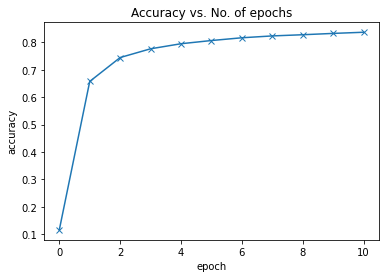

In [50]:
history = [result0] + history1 + history2 
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [51]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


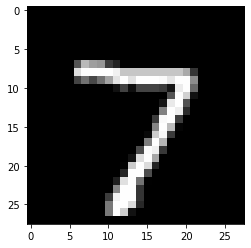

In [52]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [53]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


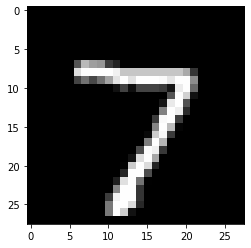

In [54]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


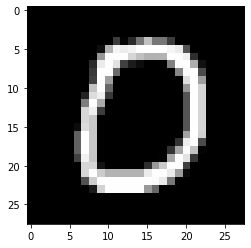

In [55]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [56]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.843554675579071, 'val_loss': 0.7877448797225952}

In [57]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [58]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0213,  0.0096,  0.0325,  ...,  0.0048,  0.0138, -0.0265],
                      [-0.0107, -0.0179,  0.0354,  ..., -0.0014, -0.0086, -0.0181],
                      [ 0.0016, -0.0067,  0.0346,  ..., -0.0229, -0.0051, -0.0090],
                      ...,
                      [-0.0066, -0.0244,  0.0002,  ..., -0.0096,  0.0240,  0.0164],
                      [ 0.0246, -0.0046, -0.0317,  ...,  0.0200, -0.0262,  0.0013],
                      [ 0.0019,  0.0354, -0.0179,  ..., -0.0255,  0.0146,  0.0247]])),
             ('linear.bias',
              tensor([-0.0174,  0.0939,  0.0060, -0.0210,  0.0223,  0.0163, -0.0119,  0.0414,
                      -0.0746, -0.0245]))])

In [59]:
model2 = MnistModel()

In [60]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0040, -0.0171, -0.0024,  ...,  0.0204,  0.0274,  0.0153],
                      [ 0.0068, -0.0159,  0.0032,  ..., -0.0086,  0.0234,  0.0176],
                      [ 0.0313,  0.0116, -0.0299,  ..., -0.0186,  0.0219, -0.0063],
                      ...,
                      [ 0.0342,  0.0209, -0.0240,  ...,  0.0040,  0.0059,  0.0231],
                      [ 0.0140, -0.0283, -0.0087,  ...,  0.0168,  0.0352,  0.0231],
                      [-0.0077, -0.0285, -0.0287,  ...,  0.0226,  0.0044,  0.0031]])),
             ('linear.bias',
              tensor([ 0.0213,  0.0233,  0.0049,  0.0179,  0.0005, -0.0249,  0.0090, -0.0248,
                       0.0151,  0.0236]))])

In [61]:
evaluate(model2, test_loader)

{'val_acc': 0.06894531100988388, 'val_loss': 2.347071409225464}

In [62]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0213,  0.0096,  0.0325,  ...,  0.0048,  0.0138, -0.0265],
                      [-0.0107, -0.0179,  0.0354,  ..., -0.0014, -0.0086, -0.0181],
                      [ 0.0016, -0.0067,  0.0346,  ..., -0.0229, -0.0051, -0.0090],
                      ...,
                      [-0.0066, -0.0244,  0.0002,  ..., -0.0096,  0.0240,  0.0164],
                      [ 0.0246, -0.0046, -0.0317,  ...,  0.0200, -0.0262,  0.0013],
                      [ 0.0019,  0.0354, -0.0179,  ..., -0.0255,  0.0146,  0.0247]])),
             ('linear.bias',
              tensor([-0.0174,  0.0939,  0.0060, -0.0210,  0.0223,  0.0163, -0.0119,  0.0414,
                      -0.0746, -0.0245]))])

In [63]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.843554675579071, 'val_loss': 0.7877448797225952}